# Python-docx

* https://python-docx.readthedocs.io/en/latest/user/documents.html

In [ ]:
!pip install python-docx

### Read docx file
* https://docs.microsoft.com/en-us/openspecs/office_standards/ms-docx/b839fe1f-e1ca-4fa6-8c26-5954d0abbccd

In [ ]:
import docx

filename = 'specification.docx'
doc = docx.Document(filename)

In [ ]:
# Read paragraphs
for p in doc.paragraphs:
    print(p.text)

In [ ]:
# Read table cell: tables > table > cell(row, col)
# doc.tables[0].table.cell(0,0).text # (row, col)
doc.tables[0].table.cell(0,1).text

### New docx file

In [1]:
import docx

doc = docx.Document() # empty docx file
doc.save('python.docx')

##### Heading

In [7]:
# heading

import docx
from docx.shared import RGBColor

doc = docx.Document()

# HEADING 1
heading1 = doc.add_heading('My Heading')                # run 0
heading1.add_run('\nAppend text here')                 # run 1
heading1.add_run('\nAppend text here').bold = False    # run 2

# default style is Heading 1 (shared by all runs of this heading)
# print(heading1.style.name) 

# run is something like text with certain attributes
# can update a specific run if required
run = heading1.runs[0]
run.italic = True
run.bold = True
run.underline = True

run.font.strike = True
run.font.double_strike = True
run.font.all_caps = True
run.font.shadow = True
run.font.color.rgb = RGBColor(0xff, 0x22, 0x00) # 0x (hex / base 16)

doc.save('python.docx')

In [8]:
# heading with level

import docx
from docx.shared import RGBColor

doc = docx.Document()

# HEADING (paragraph styles)
# doc.add_heading('Title (level 0)', 0) 

# Level (default 1)
# 0      title
# 1 - 9  heading

for level in range(0, 10):
    heading = doc.add_heading('HEADING - ', level) # with different style
    heading.add_run(heading.style.name)

doc.save('python.docx')

In [10]:
# change style of heading
import docx
from docx.shared import RGBColor

doc = docx.Document()

# heading1 = doc.add_heading('Heading 1')                # run 0 => use Heading 1 Style
heading1 = doc.add_heading('My Heading', level=1)       # equivalent => use Heading 1 Style
heading1.add_run('\nAppend text here')                 # run 1
heading1.add_run('\nAppend text here').bold = False    # run 2
heading1.add_run('\nAppend text here', style=doc.styles['Title Char'])  # run 3 with character level style               

# change style of all runs (can set paragraph level style only)
# heading1.style = doc.styles['Normal'] # paragraph level style

doc.save('python.docx')

<font color=grey>(brief introduction to the styles - please refer to style.ipynb)</font>

##### Paragraph

In [11]:
import docx

doc = docx.Document()

paragraph = doc.add_paragraph('Programming is fun. I love programming.')
paragraph.text = paragraph.text + '\nThis is very nice.'

paragraph.add_run('\nI am a beginner.') # same paragraph

doc.save('python.docx')

In [12]:
import docx

doc = docx.Document()

paragraph = doc.add_paragraph('Programming is fun. I love programming.')

# styles: Normal, Heading 1, Heading 2, Heading 3...
paragraph.style = doc.styles['Heading 2'] # paragraph level style

doc.save('python.docx')

In [13]:
import docx

doc = docx.Document()

paragraph = doc.add_paragraph('Programming is fun.', style='Normal')
paragraph = doc.add_paragraph('Programming is fun.', style=doc.styles['Heading 1'])

#################################################
# WARNING: You cannot pass style to add_heading 
#################################################
# paragraph = doc.add_heading('Programming is fun.', style='Normal') # NOT WORKING , you must pass level

doc.save('python.docx')

##### Break
* Line break
* Page break

In [14]:
# line break

import docx
from docx.text.run import *

doc = docx.Document()

# Source: https://en.wikipedia.org/wiki/Albert_Einstein (CC BY-SA)
text1 = '''Albert Einstein (14 March 1879 – 18 April 1955) was a German-born theoretical physicist, widely acknowledged to be one of the greatest physicists of all time. Einstein is known for developing the theory of relativity, but he also made important contributions to the development of the theory of quantum mechanics. Relativity and quantum mechanics are together the two pillars of modern physics. His mass–energy equivalence formula E = mc2, which arises from relativity theory, has been dubbed "the world's most famous equation". His work is also known for its influence on the philosophy of science. He received the 1921 Nobel Prize in Physics "for his services to theoretical physics, and especially for his discovery of the law of the photoelectric effect", a pivotal step in the development of quantum theory. His intellectual achievements and originality resulted in "Einstein" becoming synonymous with "genius".'''

p1 = doc.add_paragraph(text1)
p1.runs[0].add_break(WD_BREAK.LINE)
p1.add_run(text1)

doc.save('python.docx')

In [15]:
# page break

import docx

doc = docx.Document()

text1 = '''Albert Einstein (14 March 1879 – 18 April 1955) was a German-born theoretical physicist, widely acknowledged to be one of the greatest physicists of all time. Einstein is known for developing the theory of relativity, but he also made important contributions to the development of the theory of quantum mechanics. Relativity and quantum mechanics are together the two pillars of modern physics. His mass–energy equivalence formula E = mc2, which arises from relativity theory, has been dubbed "the world's most famous equation". His work is also known for its influence on the philosophy of science. He received the 1921 Nobel Prize in Physics "for his services to theoretical physics, and especially for his discovery of the law of the photoelectric effect", a pivotal step in the development of quantum theory. His intellectual achievements and originality resulted in "Einstein" becoming synonymous with "genius".'''

doc.add_paragraph(text1)
doc.add_page_break() # page break here
doc.add_paragraph(text1)

doc.save('python.docx')

##### List
* Bullet
* Number

In [18]:
import docx

doc = docx.Document()

# Bullet list (each item is a paragraph)
doc.add_paragraph('Buy milk', style='List Bullet') # can set paragraph level style
doc.add_paragraph('Buy bread', style='List Bullet')
doc.add_paragraph('Pay bills', style='List Bullet')

# numbered list (each item is a paragrahy)
doc.add_paragraph('Planning', style='List Number')   # 1 
doc.add_paragraph('Coding', style='List Number')     # 2

doc.add_paragraph('Debugging', style='List Number')  # 3 
doc.add_paragraph('Module A', style='List Number 2')  # 3-1
doc.add_paragraph('Module B', style='List Number 2')  # 3-2

doc.add_paragraph('Deployment', style='List Number') # 4
doc.add_paragraph('Module A', style='List Bullet 2')  # 4 • 
doc.add_paragraph('Module B', style='List Bullet 2')  # 4 •

doc.save('python.docx')

#### Table
* https://python-docx.readthedocs.io/en/latest/api/enum/WdAlignParagraph.html
* https://python-docx.readthedocs.io/en/latest/api/enum/WdCellVerticalAlignment.html

In [19]:
import docx

from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.enum.table import WD_ALIGN_VERTICAL

doc = docx.Document()

items = (
    ('7:00am', 'Breakfast'),
    ('12:00pm', 'Lunch'),
    ('3:00pm', 'Tea'),
    ('8:00pm', 'Dinner'),
    ('12:00pm', 'Sleep'),
) # tuple of tuples

# add table 
table = doc.add_table(rows=1, cols=2) # for header 
table.style = doc.styles['Light List'] # table style

# header row
heading_cells = table.rows[0].cells
heading_cells[0].text = 'Time' # paragraph
heading_cells[1].text = 'Schedule'
# heading_cells[0].add_paragraph('more info')

# get a table.cell(row, col) & set alignment
table.cell(0,0).paragraphs[0].alignment = WD_ALIGN_PARAGRAPH.CENTER # alignment of paragraph, not cell
table.cell(0,1).paragraphs[0].alignment = WD_ALIGN_PARAGRAPH.CENTER # alignment of paragraph, not cell

# vertical_alignment
table.cell(0,0).vertical_alignment = WD_ALIGN_VERTICAL.CENTER # vertical_alignment of cell
table.cell(0,1).vertical_alignment = WD_ALIGN_VERTICAL.CENTER # vertical_alignment of cell


# set cell content
for item in items:
    cells = table.add_row().cells # add rows here, .cells (return tuple of cell)
    cells[0].text = item[0]
    cells[1].text = item[1]
    
#     cells[0].paragraphs[0].style = doc.styles['Subtitle'] # set paragrahy style here
    cells[0].paragraphs[0].alignment = WD_ALIGN_PARAGRAPH.CENTER 
    cells[0].vertical_alignment = WD_ALIGN_VERTICAL.CENTER  # vertical_alignment of cell
    cells[1].vertical_alignment = WD_ALIGN_VERTICAL.CENTER  # vertical_alignment of cell

doc.save('python.docx')

##### Image
* https://python-docx.readthedocs.io/en/latest/dev/analysis/features/shapes/picture.html

In [20]:
import docx
from docx.shared import Inches, Cm

doc = docx.Document()

doc.add_picture('einstein_public_domain.jpg', width=Cm(8))
doc.save('python.docx')

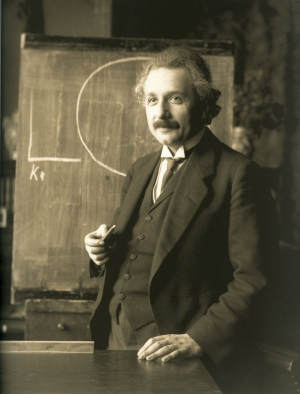

In [22]:
from IPython.display import Image, display

# FORMAT: blob = doc.part.related_parts[ rId ].image.blob

for key, value in doc.part.related_parts.items(): # dict
#     print(value) # different parts (e.g. styles, settings, image)
    if isinstance(value, docx.parts.image.ImagePart):
        blob = value.image.blob # binary large object
        display(Image(blob))


### Margin & Orientation
* https://python-docx.readthedocs.io/en/latest/user/sections.html


In [26]:
import docx
from docx.enum.section import WD_SECTION, WD_ORIENT
from docx.shared import Inches, Cm

doc = docx.Document()

# Set page margin
margin = Cm(1)
section = doc.sections[0]
section.top_margin = margin
section.left_margin = margin
section.bottom_margin = margin
section.right_margin = margin

# set page orientation
# if you change orientation, you must also swap the width and height immediately
section.orientation = WD_ORIENT.LANDSCAPE
new_width, new_height = section.page_height, section.page_width
section.page_width = new_width
section.page_height = new_height

text1 = '''Albert Einstein (14 March 1879 – 18 April 1955) was a German-born theoretical physicist, widely acknowledged to be one of the greatest physicists of all time. Einstein is known for developing the theory of relativity, but he also made important contributions to the development of the theory of quantum mechanics. Relativity and quantum mechanics are together the two pillars of modern physics. His mass–energy equivalence formula E = mc2, which arises from relativity theory, has been dubbed "the world's most famous equation". His work is also known for its influence on the philosophy of science. He received the 1921 Nobel Prize in Physics "for his services to theoretical physics, and especially for his discovery of the law of the photoelectric effect", a pivotal step in the development of quantum theory. His intellectual achievements and originality resulted in "Einstein" becoming synonymous with "genius".'''
for i in range(1, 100):
    doc.add_paragraph(f'{i}: {text1}')

doc.save('python.docx')

##### Header / Footer

In [27]:
import docx
from docx.shared import RGBColor
from docx.enum.text import WD_ALIGN_PARAGRAPH
from datetime import date

doc = docx.Document()
section = doc.sections[0]

# Header
headerParagraphs = section.header.paragraphs[0]

headerParagraphs.text = 'My Header' # header text
headerParagraphs.alignment = WD_ALIGN_PARAGRAPH.CENTER  # alignment
headerParagraphs.bold = True
headerParagraphs.underline = True

# Footer
footerParagraphs = section.footer.paragraphs[0]

footerParagraphs.text = f'Last-modified - {date.today()}'
footerParagraphs.alignment = WD_ALIGN_PARAGRAPH.CENTER
footerParagraphs.bold = True
footerParagraphs.italic = True
footerParagraphs.underline = True

footerParagraphs.strike = True
footerParagraphs.double_strike = True
footerParagraphs.all_caps = True
footerParagraphs.shadow = True
# footerParagraphs.color.rgb = RGBColor(0xff, 0x22, 0x00) # 0x (hex / base 16)

doc.save('python.docx')

##### Page Number
* https://stackoverflow.com/questions/56658872/add-page-number-using-python-docx
* 2 methods:
    1. Load docx file with page number defined
    1. Add xml

In [28]:
# METHOD 1 (LOAD TEMPLATE)
import docx
doc = docx.Document('template_page_number.docx') # page number is included in this docx file

text1 = '''Albert Einstein (14 March 1879 – 18 April 1955) was a German-born theoretical physicist, widely acknowledged to be one of the greatest physicists of all time. Einstein is known for developing the theory of relativity, but he also made important contributions to the development of the theory of quantum mechanics. Relativity and quantum mechanics are together the two pillars of modern physics. His mass–energy equivalence formula E = mc2, which arises from relativity theory, has been dubbed "the world's most famous equation". His work is also known for its influence on the philosophy of science. He received the 1921 Nobel Prize in Physics "for his services to theoretical physics, and especially for his discovery of the law of the photoelectric effect", a pivotal step in the development of quantum theory. His intellectual achievements and originality resulted in "Einstein" becoming synonymous with "genius".'''
for i in range(0, 100):
    doc.add_paragraph(text1)
    doc.add_page_break()

doc.save('python.docx')

In [29]:
# METHOD 2 (XML)
# https://stackoverflow.com/questions/56658872/add-page-number-using-python-docx

import docx
from docx.oxml import OxmlElement, ns
from docx.enum.text import WD_ALIGN_PARAGRAPH

def create_element(name):
    return OxmlElement(name)

def create_attribute(element, name, value):
    element.set(ns.qn(name), value)

def add_page_number(paragraph): # Page X
    page_run = paragraph.add_run()
    
    t1 = create_element('w:t')
    create_attribute(t1, 'xml:space', 'preserve')
    t1.text = 'Page '
    page_run._r.append(t1)
    
    page_num_run = paragraph.add_run()
    
    fldChar1 = create_element('w:fldChar')
    create_attribute(fldChar1, 'w:fldCharType', 'begin')

    instrText = create_element('w:instrText')
    create_attribute(instrText, 'xml:space', 'preserve')
    instrText.text = 'PAGE'

    fldChar2 = create_element('w:fldChar')
    create_attribute(fldChar2, 'w:fldCharType', 'end')

    page_num_run._r.append(fldChar1)
    page_num_run._r.append(instrText)
    page_num_run._r.append(fldChar2)
    
def add_page_number_with_total(paragraph): # Page X of Y

    page_run = paragraph.add_run()
    t1 = create_element('w:t')
    create_attribute(t1, 'xml:space', 'preserve')
    t1.text = 'Page '
    page_run._r.append(t1)

    page_num_run = paragraph.add_run()

    fldChar1 = create_element('w:fldChar')
    create_attribute(fldChar1, 'w:fldCharType', 'begin')

    instrText = create_element('w:instrText')
    create_attribute(instrText, 'xml:space', 'preserve')
    instrText.text = 'PAGE'

    fldChar2 = create_element('w:fldChar')
    create_attribute(fldChar2, 'w:fldCharType', 'end')

    page_num_run._r.append(fldChar1)
    page_num_run._r.append(instrText)
    page_num_run._r.append(fldChar2)

    of_run = paragraph.add_run()
    t2 = create_element('w:t')
    create_attribute(t2, 'xml:space', 'preserve')
    t2.text = ' of '
    of_run._r.append(t2)

    fldChar3 = create_element('w:fldChar')
    create_attribute(fldChar3, 'w:fldCharType', 'begin')

    instrText2 = create_element('w:instrText')
    create_attribute(instrText2, 'xml:space', 'preserve')
    instrText2.text = 'NUMPAGES'

    fldChar4 = create_element('w:fldChar')
    create_attribute(fldChar4, 'w:fldCharType', 'end')

    num_pages_run = paragraph.add_run()
    num_pages_run._r.append(fldChar3)
    num_pages_run._r.append(instrText2)
    num_pages_run._r.append(fldChar4)
    
doc = docx.Document()
section = doc.sections[0]

# page numbers for header and footer
headerParagraphs = section.header.paragraphs[0]
headerParagraphs.alignment = WD_ALIGN_PARAGRAPH.LEFT

footerParagraphs = section.footer.paragraphs[0]
footerParagraphs.alignment = WD_ALIGN_PARAGRAPH.LEFT

add_page_number(headerParagraphs) # Page X
add_page_number_with_total(footerParagraphs) # Page X of Y

# add text
text1 = '''Albert Einstein (14 March 1879 – 18 April 1955) was a German-born theoretical physicist, widely acknowledged to be one of the greatest physicists of all time. Einstein is known for developing the theory of relativity, but he also made important contributions to the development of the theory of quantum mechanics. Relativity and quantum mechanics are together the two pillars of modern physics. His mass–energy equivalence formula E = mc2, which arises from relativity theory, has been dubbed "the world's most famous equation". His work is also known for its influence on the philosophy of science. He received the 1921 Nobel Prize in Physics "for his services to theoretical physics, and especially for his discovery of the law of the photoelectric effect", a pivotal step in the development of quantum theory. His intellectual achievements and originality resulted in "Einstein" becoming synonymous with "genius".'''
for i in range(0, 100):
    doc.add_paragraph(text1)

doc.save("python.docx")

##### Meta data
* https://python-docx.readthedocs.io/en/latest/api/document.html#coreproperties-objects

In [30]:
import docx

doc = docx.Document()

doc.core_properties.author = 'Paul Chan'
doc.core_properties.category = 'Love letter'
doc.core_properties.comment = 'I love programming.'
doc.core_properties.keywords = 'python, programming, docx'
doc.core_properties.language = 'English'
doc.core_properties.title = 'Learning Python'
doc.core_properties.subject = 'Working with docx document'
doc.core_properties.version = '1.0.1'

doc.add_paragraph('Meta data demo')
doc.save('python.docx')